In [ ]:
#Librerias

import numpy as np
import matplotlib.pyplot as plt
import timeit
import time

##Ejercicicio 2.2


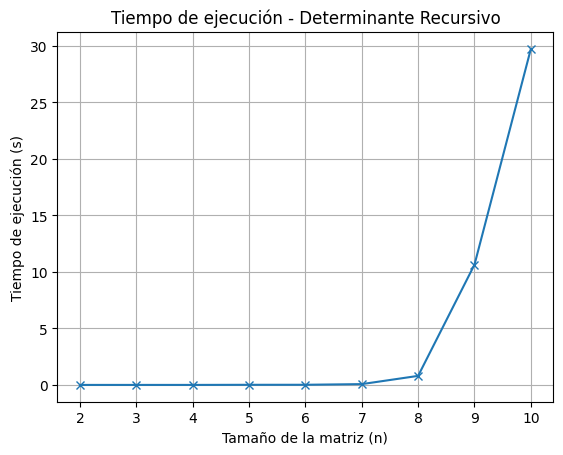

In [ ]:
def Det(Mat):
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])
    deter = 0.0
    for col in range(Mat.shape[0]):
        deter += ((-1) ** col) * Mat[0][col] * Det(np.delete(np.delete(Mat, 0, axis=0), col, axis=1))
    return deter

sizes = range(2, 11, 1)
det_times = []

for n in sizes:
    A = 2 * np.eye(n) + np.diag(-1 * np.ones(n-1), k=1) + np.diag(-1 * np.ones(n-1), k=-1)
    start = time.perf_counter()
    Det(A)
    end = time.perf_counter()
    det_times.append(end - start)

plt.plot(sizes, det_times, marker='x')
plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Tiempo de ejecución - Determinante Recursivo')
plt.grid()
plt.show()

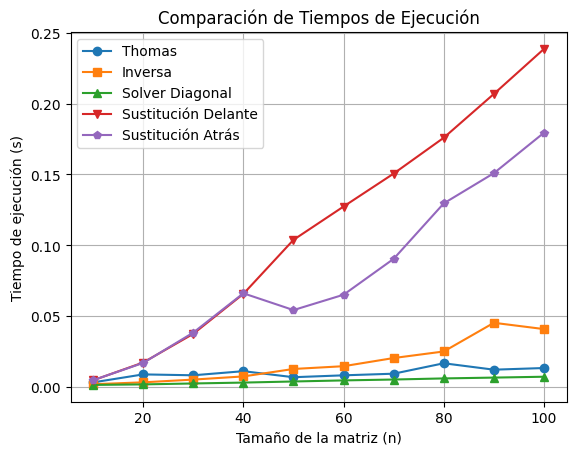

In [ ]:


# Algoritmo de Thomas
def Thomas(DP, DS, DI, b):
    n = len(DP)
    x = np.zeros(n)
    for i in range(1, n):
        DP[i] = DP[i] - (DI[i-1] / DP[i-1]) * DS[i-1]
    x[-1] = b[-1] / DP[-1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - DS[i] * x[i+1]) / DP[i]
    return x

# Solución por Inversa
def SolveInv(Mat, vec):
    InvMat = np.linalg.inv(Mat)
    return InvMat @ vec

# Solver Diagonal
def SolverDiagonal(A, b):
    n = len(A)
    x = np.zeros_like(A, dtype=float)
    for i in range(n):
        x[i] = b[i] / A[i]
    return x

# Sustitución Hacia Delante
def SustitucionDelante(Mat, b):
    n = Mat.shape[0]
    x = np.zeros(n)
    for i in range(n):
        SumCum = 0.0
        for j in range(i):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]
    return x

# Sustitución Hacia Atrás
def SustitucionAtras(Mat, b):
    n = Mat.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        SumCum = 0.0
        for j in range(i+1, n):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]
    return x

sizes = range(10, 101, 10)

# Almacenar tiempos de ejecución
thomas_times = []
solveinv_times = []
solv_diag_times = []
sust_delante_times = []
sust_atras_times = []

for n in sizes:
    DP = 2 * np.ones(n)
    DS = -1 * np.ones(n-1)
    DI = -1 * np.ones(n-1)
    b = np.ones(n)
    A = 2 * np.eye(n) + np.diag(-1 * np.ones(n-1), k=1) + np.diag(-1 * np.ones(n-1), k=-1)

    # Thomas
    thomas_times.append(timeit.timeit(lambda: Thomas(DP.copy(), DS.copy(), DI.copy(), b.copy()), number=100))

    # Solución por Inversa
    solveinv_times.append(timeit.timeit(lambda: SolveInv(A, b), number=100))

    # Solver Diagonal
    solv_diag_times.append(timeit.timeit(lambda: SolverDiagonal(DP, b), number=100))

    # Sustitución hacia adelante
    L = np.tril(A)
    sust_delante_times.append(timeit.timeit(lambda: SustitucionDelante(L, b), number=100))

    # Sustitución hacia atrás
    U = np.triu(A)
    sust_atras_times.append(timeit.timeit(lambda: SustitucionAtras(U, b), number=100))

# Graficar todos los tiempos en una sola gráfica
plt.plot(sizes, thomas_times, marker='o', label='Thomas')
plt.plot(sizes, solveinv_times, marker='s', label='Inversa')
plt.plot(sizes, solv_diag_times, marker='^', label='Solver Diagonal')
plt.plot(sizes, sust_delante_times, marker='v', label='Sustitución Delante')
plt.plot(sizes, sust_atras_times, marker='p', label='Sustitución Atrás')

plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparación de Tiempos de Ejecución')
plt.legend()
plt.grid()
plt.show()

###**Analisis**

####**Explicacion de los problemas**



> El codigo no esta documentado ya que basicamente es lo de las ayudantias


Tenemos 2 problema a la hora de realizar el trabajo note varias cosas entre ellas podemos ver que segun donde se corra el codigo este puede cambiar el tiempo de los algoritmos al ser google collab un entorno donde no siempre tenemos los mismos parametros de ejecucion al ser un servicio en la nube no se puede alcanzar a notar del todo que como estos algoritmos cambian su tiempo de ejecucion deacuerdo al tiempo por lo que es ampliamente recomendable correrlos de manera local para apreciar esto, ahora el segundo problema que se me precento fue al momento de realizar el ejercicio para det, ya que este es muy complejo hablando computacionalmente i.e esto me llevo a realizar una demostracion para poder justificar el por que no lo agregue a la grafica final y lo resage al inicio igualmente al correrlo de nada va funcionar pero lo dejo ya que fue parte de las indicaciones, a continuacion agregare la demostracion que realice:

Primero notemos que e el número total de operaciones de recursión para calcular el determinante de una matriz $nxn$ es por definicion del algoritmo y no muy dificil de ver:

$$ T(n) = n \cdot T(n- 1) + O(n) $$

Notemos que $ O(n) $ viene de las operaciones necesarias para calcular la suma de los productos en la expansión de cofactores, y $ T(n-1) $ representa el costo de calcular el determinante de las submatrices $ (n-1) \times (n-1) $.

Apartir de este momento solo es aplicar recurrencia lo hare algo mas extenso para que se pueda llegar a comprender y visualizar el patron:

La recurrencia $ T(n) = n \cdot T(n-1) + O(n) $:

- $ T(n) = n \cdot T(n-1) + O(n) $
- $ T(n-1) = (n-1) \cdot T(n-2) + O(n-1) $
- $ T(n-2) = (n-2) \cdot T(n-3) + O(n-2) $

Si continuamos expandiendo recursivamente, llegamos a:

$$
T(n) = n \cdot (n-1) \cdot (n-2) \cdot \dots \cdot 2 \cdot T(1) + O(n!)
$$

Por lo tanto, la complejidad total es:

$$
T(n) = O(n!) + O(n!) = O(n!)
$$

Como podemos visualizar el orden de complejidad es factorial por que ni en un millon de años ibamos a poder realizar la comparativa que se nos pidio por lo que ahora si podemos continuar explicando que sucede con cada uno de los demas algoritmos.

#### **Analisis de los resultados**

Al ver la grafica de manera local podemos notar que solverdiagonal y thomas tienen un comportamiento muy similar por lo que podemos afirmar hasta cierto punto que tienen un orden de complejidad similar (sin realizar la demostracion pertinente), a su vez inversa tiene una complejidad similar al inicio aun que aproximadamente depues de matrices de 80x80 tenemos que pasas a tener un comportamiento gigantesco es decir a mi parecer seria algo de tipo exponencial

De la misma manera tanto sustitucion hacia atras como hacia delante tienen un comportamiento parecido entre ellos pero algo mas alto que los mencionados anteriormente

